In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

A lot of inital EDA was done on the Chicago Data Portal itself. It was through that EDA that we found the subtopics we would cover. 

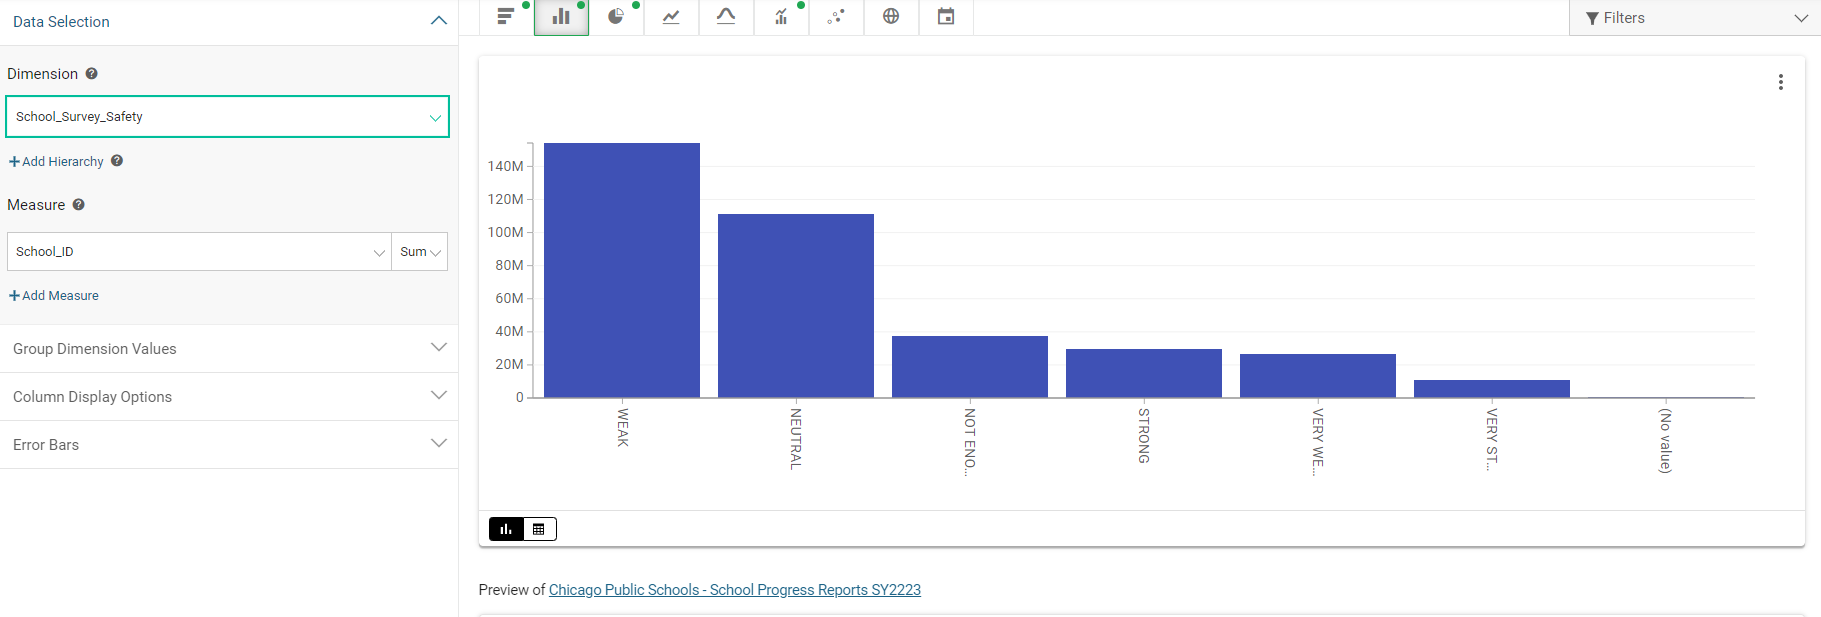

All datasets were taken from the Chicago Data Portal from the Education tab: https://data.cityofchicago.org/browse?category=Education

The first dataset/school profile info: https://data.cityofchicago.org/Education/Chicago-Public-Schools-School-Profile-Information-/9a5f-2r4p

Second dataset/school progress report: https://data.cityofchicago.org/Education/Chicago-Public-Schools-School-Progress-Reports-SY2/d7as-muwj

Third dataset/ward information: https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t

In [3]:
df = pd.read_csv('cps-school-info22.csv')

In [4]:
df.head(3)
#lots of unneeded columns, filter df to only contain needed columns
profile = df[['School_ID', 'Long_Name', 'Primary_Category', 'Zip', 'Student_Count_Total', 'Student_Count_Low_Income', 'Student_Count_Special_Ed', 'Student_Count_Black', 'Student_Count_Hispanic', 'Student_Count_White', 'Student_Count_Asian', 'Student_Count_Native_American', 'Student_Count_Asian_Pacific_Islander', 'Student_Count_Hawaiian_Pacific_Islander', 'Statistics_Description', 'Demographic_Description', 'Overall_Rating', 'School_Latitude', 'School_Longitude', 'Location']]
profile.head()

,School_ID,Long_Name,Primary_Category,Zip,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_Black,Student_Count_Hispanic,Student_Count_White,Student_Count_Asian,Student_Count_Native_American,Student_Count_Asian_Pacific_Islander,Student_Count_Hawaiian_Pacific_Islander,Statistics_Description,Demographic_Description,Overall_Rating,School_Latitude,School_Longitude,Location
0,610067,Francis M McKay Elementary School,ES,60629,623,501,98,439,168,12,0,3,0,0,There are 623 students enrolled at MCKAY. 80....,The largest demographic at MCKAY is Black. Th...,Level 1,41.768143,-87.691787,POINT (-87.691787 41.768143)
1,610004,Countee Cullen Elementary School,ES,60628,164,130,23,158,2,1,0,0,0,0,There are 164 students enrolled at CULLEN. 79...,The largest demographic at CULLEN is Black. T...,Level 1,41.700335,-87.611244,POINT (-87.611244 41.700335)
2,400180,KIPP One Academy,ES,60624,"1,003",825,103,628,367,4,0,1,0,1,There are 1003 students enrolled at KIPP - ONE...,The largest demographic at KIPP - ONE is Black...,Level 1+,41.893805,-87.726615,POINT (-87.726615 41.893805)
3,400118,Noble - DRW College Prep,HS,60624,353,306,91,345,6,1,0,1,0,0,There are 353 students enrolled at NOBLE - DRW...,The largest demographic at NOBLE - DRW HS is B...,Level 2,41.869328,-87.711654,POINT (-87.711654 41.869328)
4,610207,John H Vanderpoel Elementary Magnet School,ES,60643,242,136,28,237,3,0,0,0,0,0,There are 242 students enrolled at VANDERPOEL....,The largest demographic at VANDERPOEL is Black...,Level 1,41.720817,-87.665559,POINT (-87.665559 41.720817)


Note: I split the data into 3 separate dataframes because I thought it would be easier to tackle nulls by dividing and conquering. I also was curious to see if there were differences in the safety scores between the 3 levels of schooling. 

I only check for missing values here to see if the missing values here actually reveal anything. I deal with the missing values in the actual ETL. 

In [5]:
#split into 3 dfs for each type of school
#create elementary school dataframe
es = profile[profile['Primary_Category'] == 'ES']
es.head(3)
es.info()
#check for null values
es.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 654
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   School_ID                                471 non-null    int64  
 1   Long_Name                                471 non-null    object 
 2   Primary_Category                         471 non-null    object 
 3   Zip                                      471 non-null    int64  
 4   Student_Count_Total                      471 non-null    object 
 5   Student_Count_Low_Income                 471 non-null    object 
 6   Student_Count_Special_Ed                 471 non-null    int64  
 7   Student_Count_Black                      471 non-null    object 
 8   Student_Count_Hispanic                   471 non-null    object 
 9   Student_Count_White                      471 non-null    object 
 10  Student_Count_Asian                      471 non-n

School_ID                                  0
Long_Name                                  0
Primary_Category                           0
Zip                                        0
Student_Count_Total                        0
Student_Count_Low_Income                   0
Student_Count_Special_Ed                   0
Student_Count_Black                        0
Student_Count_Hispanic                     0
Student_Count_White                        0
Student_Count_Asian                        0
Student_Count_Native_American              0
Student_Count_Asian_Pacific_Islander       0
Student_Count_Hawaiian_Pacific_Islander    0
Statistics_Description                     1
Demographic_Description                    0
Overall_Rating                             1
School_Latitude                            0
School_Longitude                           0
Location                                   0
dtype: int64

In [6]:
result = es['Overall_Rating'].isnull().to_numpy().nonzero()
print(result)
#find index of missing values
result = es['Statistics_Description'].isnull().to_numpy().nonzero()
print(result)
#look at the row with the missing value
es.iloc[[166]]
#turns out the school with the missing value doesn't exist any more, drop row
es = es.drop([df.index[250]])
#look at row with the missing value, this one simply didn't get a rating so im leaving it in
es.iloc[[35]]

(array([35], dtype=int64),)
(array([166], dtype=int64),)


,School_ID,Long_Name,Primary_Category,Zip,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_Black,Student_Count_Hispanic,Student_Count_White,Student_Count_Asian,Student_Count_Native_American,Student_Count_Asian_Pacific_Islander,Student_Count_Hawaiian_Pacific_Islander,Statistics_Description,Demographic_Description,Overall_Rating,School_Latitude,School_Longitude,Location
55,610596,The Virtual Academy Elementary School,ES,60608,242,150,117,103,107,22,8,0,0,0,There are 242 students enrolled at VIRTUAL ACA...,The largest demographic at VIRTUAL ACADEMY ES ...,NaN,41.862714,-87.660139,POINT (-87.6601387 41.8627144)


In [7]:
# create middle school dataframe
ms =  profile[profile['Primary_Category'] == 'MS']
#check for missing values
ms.isnull().sum()

School_ID                                  0
Long_Name                                  0
Primary_Category                           0
Zip                                        0
Student_Count_Total                        0
Student_Count_Low_Income                   0
Student_Count_Special_Ed                   0
Student_Count_Black                        0
Student_Count_Hispanic                     0
Student_Count_White                        0
Student_Count_Asian                        0
Student_Count_Native_American              0
Student_Count_Asian_Pacific_Islander       0
Student_Count_Hawaiian_Pacific_Islander    0
Statistics_Description                     0
Demographic_Description                    0
Overall_Rating                             0
School_Latitude                            0
School_Longitude                           0
Location                                   0
dtype: int64

In [8]:
#create hs dataframe
hs =  profile[profile['Primary_Category'] == 'HS']
# check for missing values
hs.isnull().sum()


School_ID                                  0
Long_Name                                  0
Primary_Category                           0
Zip                                        0
Student_Count_Total                        0
Student_Count_Low_Income                   0
Student_Count_Special_Ed                   0
Student_Count_Black                        0
Student_Count_Hispanic                     0
Student_Count_White                        0
Student_Count_Asian                        0
Student_Count_Native_American              0
Student_Count_Asian_Pacific_Islander       0
Student_Count_Hawaiian_Pacific_Islander    0
Statistics_Description                     6
Demographic_Description                    0
Overall_Rating                             1
School_Latitude                            0
School_Longitude                           0
Location                                   0
dtype: int64

In [9]:
#find indexes of the rows with missing values 
result = hs['Statistics_Description'].isnull().to_numpy().nonzero()
print(result)
# look at the rows with the missing values 
hs.iloc[[10,21,30,85,88,135]]
# all of the rows with missing values are schools that aren't open anymore, drop the rows 
hs = hs.drop([df.index[34]])
hs = hs.drop([df.index[69]])
hs = hs.drop([df.index[93]])
hs = hs.drop([df.index[301]])
hs = hs.drop([df.index[318]])
hs = hs.drop([df.index[490]])

(array([ 10,  21,  30,  85,  88, 135], dtype=int64),)


In [10]:
#concat the 3 df's together
frames = [es, ms, hs]
info = pd.concat(frames)
#check the df
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 653
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   School_ID                                648 non-null    int64  
 1   Long_Name                                648 non-null    object 
 2   Primary_Category                         648 non-null    object 
 3   Zip                                      648 non-null    int64  
 4   Student_Count_Total                      648 non-null    object 
 5   Student_Count_Low_Income                 648 non-null    object 
 6   Student_Count_Special_Ed                 648 non-null    int64  
 7   Student_Count_Black                      648 non-null    object 
 8   Student_Count_Hispanic                   648 non-null    object 
 9   Student_Count_White                      648 non-null    object 
 10  Student_Count_Asian                      648 non-n

In [11]:
# read in second dataset
df2 = pd.read_csv('cps-progress-report22.csv')

In [12]:
#filter for only needed columns
safety = df2[['School_ID', 'Long_Name', 'Primary_Category', 'Zip','School_Survey_Safety', 'Chronic_Truancy_Pct']]


In [13]:
#check for nulls
safety.isnull().sum()
#find indexes of null values
result = safety['School_Survey_Safety'].isnull().to_numpy().nonzero()
print(result)
#look at nulls
safety.iloc[[81,87]]
#drop null values
safety = safety.drop([safety.index[81]])
safety = safety.drop([safety.index[87]])
#ind null values
result = safety['Chronic_Truancy_Pct'].isnull().to_numpy().nonzero()
print(result)
#look at null values, I decide to not drop them
safety.iloc[[86,  88, 113, 114, 115, 162, 163, 165, 167, 178, 179, 187, 253,
       404, 407, 469, 559, 593, 604, 624, 630, 631, 632, 633, 634, 635,
       636, 643, 644, 645, 646, 647, 648]]

(array([81, 87], dtype=int64),)
(array([ 86,  88, 113, 114, 115, 162, 163, 165, 167, 178, 179, 187, 253,
       404, 407, 469, 559, 593, 604, 624, 630, 631, 632, 633, 634, 635,
       636, 643, 644, 645, 646, 647, 648], dtype=int64),)


,School_ID,Long_Name,Primary_Category,Zip,School_Survey_Safety,Chronic_Truancy_Pct
87,400134,YCCS-Jane Addams Alternative HS,HS,60616,NaN,NaN
90,400137,Little Black Pearl Art and Design Academy,HS,60653,NEUTRAL,NaN
115,400173,Pathways in Education- Brighton Park,HS,60632,NEUTRAL,NaN
116,400175,Excel Academy of South Shore,HS,60649,WEAK,NaN
117,400176,Excel Academy Southwest,HS,60629,NEUTRAL,NaN
164,609744,Northside Learning Center High School,HS,60659,NOT ENOUGH DATA,NaN
165,609745,Southside Occupational Academy High School,HS,60636,VERY STRONG,NaN
167,609748,Consuella B York Alternative HS,HS,60608,WEAK,NaN
169,609750,Simpson Academy HS for Young Women,HS,60608,NEUTRAL,NaN
180,609766,Jacqueline B Vaughn Occupational High School,HS,60641,NOT ENOUGH DATA,NaN


In [14]:
#merge the 2 dataframes
safety_info = pd.merge(info, safety, how='inner', on=['School_ID', 'Long_Name', 'Zip', 'Primary_Category'])
#check the merged dataframe
safety_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 0 to 645
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   School_ID                                646 non-null    int64  
 1   Long_Name                                646 non-null    object 
 2   Primary_Category                         646 non-null    object 
 3   Zip                                      646 non-null    int64  
 4   Student_Count_Total                      646 non-null    object 
 5   Student_Count_Low_Income                 646 non-null    object 
 6   Student_Count_Special_Ed                 646 non-null    int64  
 7   Student_Count_Black                      646 non-null    object 
 8   Student_Count_Hispanic                   646 non-null    object 
 9   Student_Count_White                      646 non-null    object 
 10  Student_Count_Asian                      646 non-n

In [15]:
#change datatypes to types that make sense
safety_info.replace(',','', regex=True, inplace=True)

safety_info['Zip'] = safety_info['Zip'].astype(str)
safety_info['School_ID'] = safety_info['School_ID'].astype(str)
safety_info['Student_Count_Total'] = safety_info['Student_Count_Total'].astype(float)
safety_info['Student_Count_Total'] = safety_info['Student_Count_Total'].astype(int)
safety_info['Student_Count_Low_Income'] = safety_info['Student_Count_Low_Income'].astype(int)
safety_info['Student_Count_Black'] = safety_info['Student_Count_Black'].astype(int)
safety_info['Student_Count_Hispanic'] = safety_info['Student_Count_Hispanic'].astype(int)
safety_info['Student_Count_White'] = safety_info['Student_Count_White'].astype(int)

In [16]:
#check for null values
safety_info.isnull().sum()

School_ID                                   0
Long_Name                                   0
Primary_Category                            0
Zip                                         0
Student_Count_Total                         0
Student_Count_Low_Income                    0
Student_Count_Special_Ed                    0
Student_Count_Black                         0
Student_Count_Hispanic                      0
Student_Count_White                         0
Student_Count_Asian                         0
Student_Count_Native_American               0
Student_Count_Asian_Pacific_Islander        0
Student_Count_Hawaiian_Pacific_Islander     0
Statistics_Description                      0
Demographic_Description                     0
Overall_Rating                              2
School_Latitude                             0
School_Longitude                            0
Location                                    0
School_Survey_Safety                        0
Chronic_Truancy_Pct               

In [17]:
#remove columns that don't have the data I'm looking for
safety_info = safety_info[safety_info['School_Survey_Safety'] != 'NOT ENOUGH DATA']
#replace safety levels with numerical values to make it easier to work with for visualizations
safety_info['School_Survey_Safety'] = safety_info['School_Survey_Safety'].replace(['VERY WEAK', 'WEAK', 'NEUTRAL', 'STRONG', 'VERY STRONG'], [1, 2, 3, 4, 5])
safety_info.head(15)
# add a count of safety scores so I can see which level has the most reponses
safety_info['count_of_scores'] = safety_info.groupby('School_Survey_Safety')['School_Survey_Safety'].transform('count')
# add an average count so I can see average safety response by type of school
safety_info['safety_avg'] = safety_info.groupby('Primary_Category')['School_Survey_Safety'].transform('mean')
safety_info.tail(5)

,School_ID,Long_Name,Primary_Category,Zip,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_Black,Student_Count_Hispanic,Student_Count_White,Student_Count_Asian,Student_Count_Native_American,Student_Count_Asian_Pacific_Islander,Student_Count_Hawaiian_Pacific_Islander,Statistics_Description,Demographic_Description,Overall_Rating,School_Latitude,School_Longitude,Location,School_Survey_Safety,Chronic_Truancy_Pct,count_of_scores,safety_avg
640,609691,North-Grand High School,HS,60639,1055,948,180,195,837,9,4,6,0,1,There are 1055 students enrolled at NORTH-GRAN...,The largest demographic at NORTH-GRAND HS is H...,Level 2+,41.911674,-87.735238,POINT (-87.735238 41.911674),2,66.0,274,2.12
641,609756,Marie Sklodowska Curie Metropolitan High School,HS,60632,2938,2553,312,296,2534,32,63,10,0,2,There are 2938 students enrolled at CURIE HS. ...,The largest demographic at CURIE HS is Hispani...,Level 2+,41.803060,-87.722042,POINT (-87.722042 41.80306),1,66.0,48,2.12
642,609735,Edward Tilden Career Community Academy HS,HS,60609,216,180,68,88,98,20,2,0,0,1,There are 216 students enrolled at TILDEN HS. ...,The largest demographic at TILDEN HS is Hispan...,Level 2,41.807510,-87.642966,POINT (-87.642966 41.80751),2,82.1,274,2.12
644,609708,Edwin G. Foreman College and Career Academy,HS,60641,565,484,127,92,441,26,3,1,0,1,There are 565 students enrolled at FOREMAN HS....,The largest demographic at FOREMAN HS is Hispa...,Level 2,41.939797,-87.754167,POINT (-87.754167 41.939797),1,71.9,48,2.12
645,609730,Nicholas Senn High School,HS,60660,1529,1115,205,393,618,268,194,11,0,2,There are 1529 students enrolled at SENN HS. ...,The largest demographic at SENN HS is Hispanic...,Level 1,41.989029,-87.667136,POINT (-87.667136 41.989029),2,55.3,274,2.12


Clara is going to join all the datasets along with the large crime dataset so that we can check correlations and create visualizations with all the datasets. There's nothing to join on the crime dataset with as of right now, so I need to add ward and district information which is not available in the 2022/23 school info dataset but is available in the 2012/13 dataset. I downloaded that dataset from the Chicago Data Portal and merged it with the safety_info dataset I already have. 

In [18]:
#read in dataset for ward/district info
data = pd.read_csv('wards.csv')

In [19]:
# filter out unnecessary columns
ward = data[['School ID', 'Name of School', 'ZIP Code', 'Community Area Number', 'Community Area Name', 'Ward', 'Police District']]
# rename columns so that names match up
ward = ward.rename(columns={'School ID': 'School_ID'})
# change datatypes of records to make sense
ward['School_ID'] = ward['School_ID'].astype(str)
ward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   School_ID              566 non-null    object
 1   Name of School         566 non-null    object
 2   ZIP Code               566 non-null    int64 
 3   Community Area Number  566 non-null    int64 
 4   Community Area Name    566 non-null    object
 5   Ward                   566 non-null    int64 
 6   Police District        566 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 31.1+ KB


In [20]:
# merge datasets
full_safety = pd.merge(ward, safety_info, how='inner', on=['School_ID'])
full_safety.info()
full_safety.head(1)
# drop repetive columns
full_safety.drop(columns=['Name of School', 'ZIP Code'], inplace=True)
# rename columns as needed
full_safety.rename(columns={'Long_Name': 'Name of School'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 449
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   School_ID                                450 non-null    object 
 1   Name of School                           450 non-null    object 
 2   ZIP Code                                 450 non-null    int64  
 3   Community Area Number                    450 non-null    int64  
 4   Community Area Name                      450 non-null    object 
 5   Ward                                     450 non-null    int64  
 6   Police District                          450 non-null    int64  
 7   Long_Name                                450 non-null    object 
 8   Primary_Category                         450 non-null    object 
 9   Zip                                      450 non-null    object 
 10  Student_Count_Total                      450 non-n

Check for Correlations between Variables in the Datasets I have. I don't really expect to see strong correlations here, since the data is pretty limited and aggregated already, but I do expect to see some correlations that can lead to ideas for visuals. 

In [21]:
# find correlations
corr = safety_info['School_Survey_Safety'].corr(safety_info['Chronic_Truancy_Pct'])
print(corr) # small, negative correlation

-0.49383925748954555


In [22]:
corr = full_safety['School_Survey_Safety'].corr(full_safety['Ward'])
print(corr) #small, positive correlation

0.21919721100589695


In [23]:
corr = safety_info['School_Survey_Safety'].corr(safety_info['Student_Count_Low_Income'])
print(corr) #small, negative correlation

-0.24676014895337833


### Exploratory Visuals

These visuals are mostly just to see what the data looks like, what correlations look like visually, and to test out some ideas I have for the overall visualizations. 

c:\Users\JassleenBhullar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Student Safety Level')

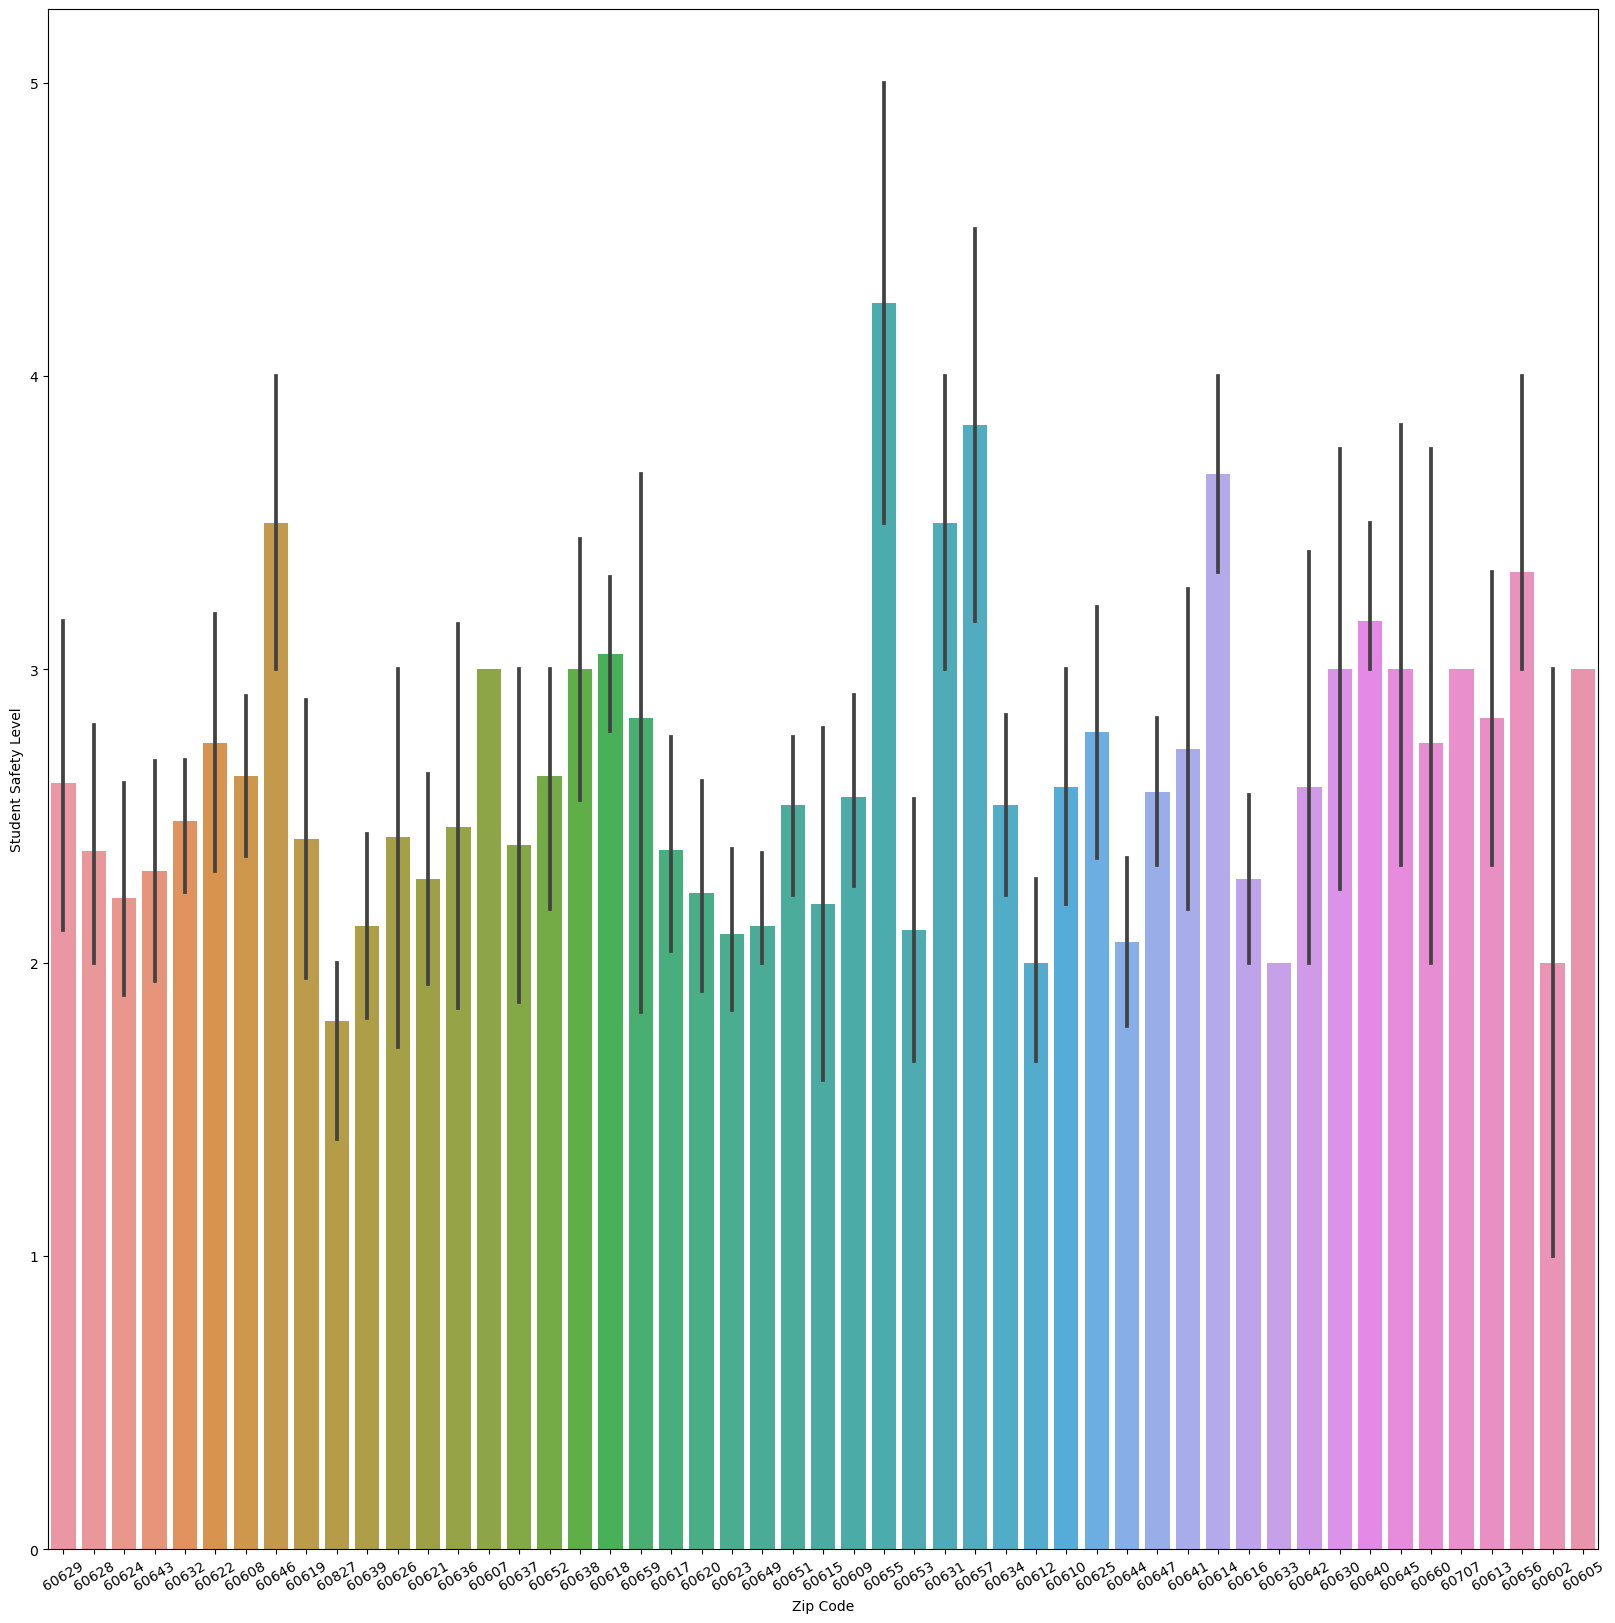

In [24]:
sns.set_palette('pastel')
plt.figure(figsize= (20,20))
y = safety_info['Zip']
x = safety_info['School_Survey_Safety']
a = sns.barplot(y, x)


plt.xticks(rotation = 30);

plt.xlabel('Zip Code')
plt.ylabel('Student Safety Level')

Text(0, 0.5, 'Chronic Truancy (%)')

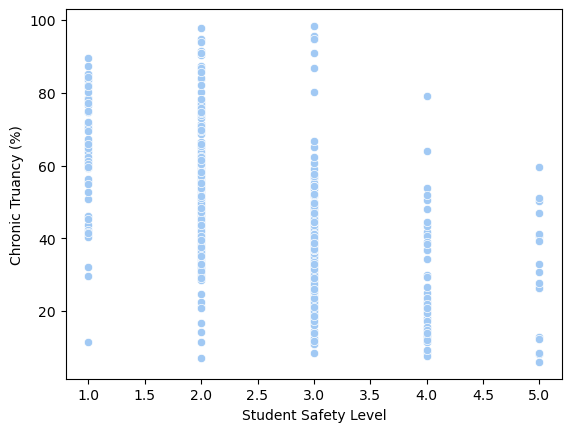

In [25]:
sns.scatterplot( x= 'School_Survey_Safety',
                 y= 'Chronic_Truancy_Pct',
                 data = safety_info,
                 
                );

plt.xlabel('Student Safety Level')
plt.ylabel('Chronic Truancy (%)')

Text(0, 0.5, 'Number of Low Income Students')

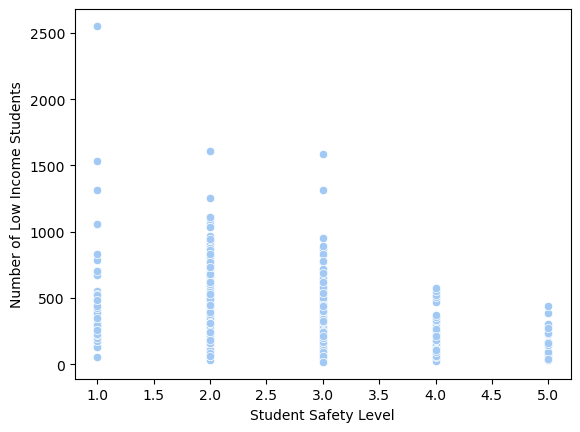

In [26]:

sns.scatterplot( x= 'School_Survey_Safety',
                 y= 'Student_Count_Low_Income',
                 data = safety_info,
                 
                );

plt.xlabel('Student Safety Level')
plt.ylabel('Number of Low Income Students')